In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('review.csv')
df.shape

(50000, 2)

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### Text Cleaning

In [4]:
#sample of random 2000 rows
df=df.sample(2000)
df.shape

(2000, 2)

In [5]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

,review,sentiment
24124,Sandra Bullock is my favorite actress..... But...,0
27166,"""Look, I know this may suck right now, but pai...",0
8020,You might suspect that the plot of this movie ...,0
17225,"In this movie, the old Amitabh Bachchan falls ...",0
41813,In Iran women are prohibited from attending li...,1


In [6]:
df.iloc[1].review

'"Look, I know this may suck right now, but pain is temporary, film is forever. Whatever you do right now is burned into celluloid for all time and for thousands of years to come." \x96 Robert De Niro<br /><br />This was initially a film for Steven Spielberg, the director hiring several screenwriters to adjust the screenplay so that it more suited his themes. And so we have a dysfunctional family that is threatened by a deranged monster in the form of a recently released from prison Robert De Niro. Like "Jurassic Park", "Poltergeist" and "War of the Worlds", the dysfunctional family bands together to defeat the beast, the beast being the creation of the father, a lawyer who failed to defend De Niro during his trial. <br /><br />In typical Spielberg fashion, the father kills the monster that undermines the family and is then promptly absolved of his sins. Like Oscar Schindler, Robin Williams, Sam Niel, Tom Cruise and virtually every "daddy" figure in Spielberg land, the father reclaims 

In [7]:
#removing html tags
import re
clean = re.compile('<.*?>')
re.sub(clean,'',df.iloc[1].review)

'"Look, I know this may suck right now, but pain is temporary, film is forever. Whatever you do right now is burned into celluloid for all time and for thousands of years to come." \x96 Robert De NiroThis was initially a film for Steven Spielberg, the director hiring several screenwriters to adjust the screenplay so that it more suited his themes. And so we have a dysfunctional family that is threatened by a deranged monster in the form of a recently released from prison Robert De Niro. Like "Jurassic Park", "Poltergeist" and "War of the Worlds", the dysfunctional family bands together to defeat the beast, the beast being the creation of the father, a lawyer who failed to defend De Niro during his trial. In typical Spielberg fashion, the father kills the monster that undermines the family and is then promptly absolved of his sins. Like Oscar Schindler, Robin Williams, Sam Niel, Tom Cruise and virtually every "daddy" figure in Spielberg land, the father reclaims his paternal duty in the

In [8]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [9]:
df['review'] = df['review'].apply(clean_html)

In [10]:
#convert to lowercase
def conv_low(text):
    return text.lower()

In [11]:
df['review'] = df['review'].apply(conv_low)

In [12]:
#remove special characters
def rem_special(text):
    x = ''
    for i in text:
        if i.isalnum(): #check if "i" is alpha numeric 
            x = x + i
        else:
            x = x + ' '
    return x

In [13]:
rem_special('t@he $$ king i&*n the north')

't he    king i  n the north'

In [14]:
df['review'] = df['review'].apply(rem_special)
df1 = df

In [15]:
#remove stop word (words like: and, a, if)
import nltk

In [16]:
from nltk.corpus import stopwords #stopwords is a class

In [17]:
def rem_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y = x[:]
    x.clear()
    return y

In [18]:
df1['review'] = df1['review'].apply(rem_stopwords)
df2 = df1
df2

,review,sentiment
24124,"[sandra, bullock, favorite, actress, movie, ho...",0
27166,"[look, know, may, suck, right, pain, temporary...",0
8020,"[might, suspect, plot, movie, written, process...",0
17225,"[movie, old, amitabh, bachchan, falls, love, m...",0
41813,"[iran, women, prohibited, attending, live, spo...",1
...,...,...
43947,"[watch, came, little, late, glad, watched, seq...",1
18207,"[think, movie, misunderstood, film, jerry, lew...",1
49394,"[1991, saw, release, two, best, sequels, time,...",1
6131,"[saw, chomps, approximately, 2, days, theatric...",1


In [19]:
#perform stemming (convert v1,v3,v4,v5 to v2)
from nltk.stem import WordNetLemmatizer, PorterStemmer
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [20]:

def stem_words(text):
    y = []
    for i in text:
        y.append(wnl.lemmatize(i) if wnl.lemmatize(i).endswith('e') else ps.stem(i))
    z = y[:]
    y.clear()
    return z

In [21]:
lists =['i','loved','loving','it']
stem_words(lists)

['i', 'love', 'love', 'it']

In [22]:
df2['review'] = df2['review'].apply(stem_words)
df3 = df2
df3

,review,sentiment
24124,"[sandra, bullock, favorite, actress, movie, ho...",0
27166,"[look, know, may, suck, right, pain, temporari...",0
8020,"[might, suspect, plot, movie, written, process...",0
17225,"[movie, old, amitabh, bachchan, fall, love, mu...",0
41813,"[iran, women, prohibit, attend, live, sport, e...",1
...,...,...
43947,"[watch, came, little, late, glad, watch, seque...",1
18207,"[think, movie, misunderstood, film, jerri, lew...",1
49394,"[1991, saw, release, two, best, sequel, time, ...",1
6131,"[saw, chomp, approxim, 2, day, theatric, relea...",1


In [23]:
df3['review'] = [','.join(map(str, l)) for l in df3['review']] #convert list to string
df4 = df3
df4

,review,sentiment
24124,"sandra,bullock,favorite,actress,movie,horrible...",0
27166,"look,know,may,suck,right,pain,temporari,film,f...",0
8020,"might,suspect,plot,movie,written,process,film,...",0
17225,"movie,old,amitabh,bachchan,fall,love,much,youn...",0
41813,"iran,women,prohibit,attend,live,sport,event,fe...",1
...,...,...
43947,"watch,came,little,late,glad,watch,sequel,toget...",1
18207,"think,movie,misunderstood,film,jerri,lewi,care...",1
49394,"1991,saw,release,two,best,sequel,time,termin,2...",1
6131,"saw,chomp,approxim,2,day,theatric,release,deli...",1


### Create Bag of words

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

In [25]:
X = cv.fit_transform(df4['review']).toarray() #2000 reviews ma 18k word haru ko term frequency compute garera matrix generate
pickle.dump(cv, open('tranform.pkl', 'wb'))

In [26]:
X.shape

(2000, 18551)

In [27]:
y = df4.iloc[:,-1].values # y -> sentiment
y.shape

(2000,)

### Training and testing data

In [28]:
#taking X,y and spliting in training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
pd.DataFrame(X)

(1600, 18551) (400, 18551) (1600,) (400,)


,0,1,2,3,4,5,6,7,8,9,...,18541,18542,18543,18544,18545,18546,18547,18548,18549,18550
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [31]:
clf1 = GaussianNB()
clf2 = MultinomialNB()

In [76]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [77]:
y_test.shape, y_pred1.shape, y_pred2.shape

((400,), (400,), (400,))

### Testing accuracy

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [60]:
print("GaussianNB has an accuracy of ",accuracy_score(y_test,y_pred1)*100,"%")
print("MultinomialNB has an accuracy of ",accuracy_score(y_test,y_pred2)*100,"%")

GaussianNB has an accuracy of  60.25 %
MultinomialNB has an accuracy of  84.25 %


In [61]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6, shuffle=True)
kf.get_n_splits(X)
print(kf) 

KFold(n_splits=6, random_state=None, shuffle=True)


In [81]:
scores1 = cross_val_score(clf1.fit(X_train,y_train), X, y, cv=kf)
print ("Cross-validated scores for Gaussian:", scores1)
scores2 = cross_val_score(clf2.fit(X_train,y_train), X, y, cv=kf)
print ("Cross-validated scores for Multinomial:", scores2)

Cross-validated scores for Gaussian: [0.58383234 0.6497006  0.58558559 0.62162162 0.60960961 0.60960961]
Cross-validated scores for Multinomial: [0.82035928 0.82634731 0.82282282 0.81681682 0.83783784 0.84684685]


In [84]:
accuracy1 = cross_val_score(clf1,X,y,scoring='accuracy',cv=kf)
print("Accuracy = ",round(100*accuracy1.mean(),5),'%')
accuracy2 = cross_val_score(clf2,X,y,scoring='accuracy',cv=kf)
print("Accuracy = ",round(100*accuracy2.mean(),5),'%')

Accuracy =  60.05107 %
Accuracy =  82.45056 %


In [64]:
filename = 'nlp_model.pkl'
pickle.dump(clf2, open(filename, 'wb'))

In [85]:
import matplotlib.pyplot as plt
import itertools


 Confusion matrix, without normalization
[[163  33]
 [ 30 174]]


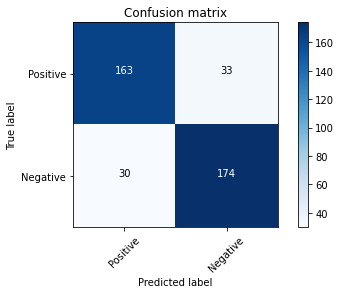

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('\n Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


cnf_matrix = metrics.confusion_matrix(y_test, y_pred2, labels =[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize= False,title='Confusion matrix')

In [88]:
report = metrics.classification_report(y_test, y_pred2, output_dict=True)
print("Classification Report")
pd.DataFrame(report).transpose()

Classification Report


,precision,recall,f1-score,support
0,0.84456,0.831633,0.838046,196.0000
1,0.84058,0.852941,0.846715,204.0000
accuracy,0.84250,0.842500,0.842500,0.8425
macro avg,0.84257,0.842287,0.842381,400.0000
weighted avg,0.84253,0.842500,0.842467,400.0000
